In [1]:
import plotly.graph_objects as go

%run -i "../src/data/build_dataset.py"

In [2]:
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,62.262521,31.131260,2.179533
1,1,42.365480,64.589411,46.570785,23.285393,3.567092
2,2,96.366276,38.344152,80.213879,40.106939,2.115580
3,3,56.804456,92.559664,11.748426,5.874213,0.348517
4,4,2.021840,83.261985,78.924891,39.462446,3.480049


In [3]:
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [4]:
terminal_radius_4

[2, 3]

Text(0, 0.5, 'y_terminal_id')

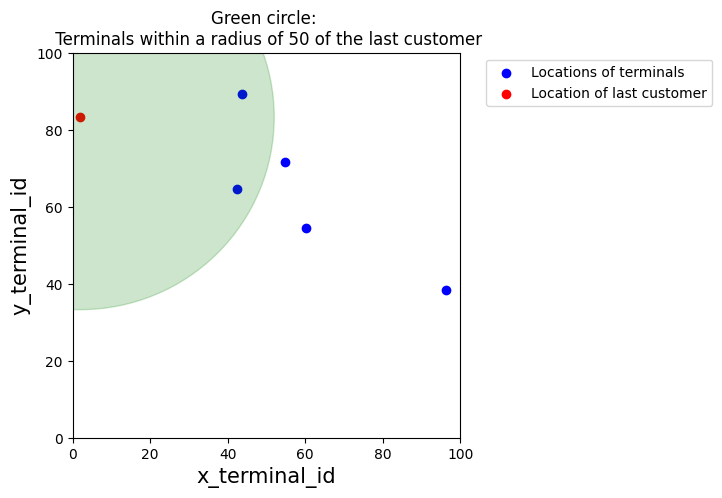

In [5]:
terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values, 
           terminal_profiles_table.y_terminal_id.values, 
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id, 
           customer_profiles_table.iloc[customer_id].y_customer_id, 
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

In [6]:
# Extract data for terminals and customer
terminals_x = terminal_profiles_table.x_terminal_id.values
terminals_y = terminal_profiles_table.y_terminal_id.values
customer_x = customer_profiles_table.iloc[4].x_customer_id
customer_y = customer_profiles_table.iloc[4].y_customer_id

# Create the figure
fig = go.Figure()

# Add scatter traces for terminals and customer
fig.add_trace(go.Scatter(x=terminals_x, y=terminals_y, mode='markers',
                         marker=dict(color='blue'),
                         name='Locations of terminals'))
fig.add_trace(go.Scatter(x=[customer_x], y=[customer_y], mode='markers',
                         marker=dict(color='red'),
                         name="Location of last customer"))

# Add a circle shape for the region within a radius of 50
fig.add_shape(type="circle",
              xref="x", yref="y",
              x0=customer_x - 50, y0=customer_y - 50,
              x1=customer_x + 50, y1=customer_y + 50,
              line_color="green",
              fillcolor="green",
              opacity=0.2)

# Customize layout
fig.update_layout(title="Green circle: Terminals within a radius of 50 of the last customer",
                  xaxis_title="x_terminal_id",
                  yaxis_title="y_terminal_id",
                  width=1000,
                  height=1000,
                  xaxis_range=[0, 100],
                  yaxis_range=[0, 100],
                  legend=dict(x=1.05, y=1))

# Display the figure
fig.show()